In [1]:
#Import libraries
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
# Load CSV file
# Data from (CO2,N2O and CH4 Emissions): https://www.fao.org/faostat/en/#data/GN 

In [3]:
energy_use = pd.read_csv("FAOSTAT_data_3-20-2022_energy_use.csv")

In [4]:
# Show first 5 rows

In [5]:
energy_use.head()

Domain Code      Domain  Area Code (FAO)         Area  Element Code  \
0          GN  Energy Use                2  Afghanistan          7225   
1          GN  Energy Use                2  Afghanistan          7225   
2          GN  Energy Use                2  Afghanistan          7225   
3          GN  Energy Use                2  Afghanistan          7225   
4          GN  Energy Use                2  Afghanistan          7225   

           Element  Item Code            Item  Year Code  Year        Unit  \
0  Emissions (CH4)       6801  Gas-Diesel oil       1990  1990  kilotonnes   
1  Emissions (CH4)       6801  Gas-Diesel oil       1991  1991  kilotonnes   
2  Emissions (CH4)       6801  Gas-Diesel oil       1992  1992  kilotonnes   
3  Emissions (CH4)       6801  Gas-Diesel oil       1993  1993  kilotonnes   
4  Emissions (CH4)       6801  Gas-Diesel oil       1994  1994  kilotonnes   

    Value Flag Flag Description  
0  0.0130    F     FAO estimate  
1  0.0106    F     FAO estimate  
2  0.0027    F     FAO estimate  
3  0.0022    F     FAO estimate  
4  0.0018    F     FAO estimate

In [6]:
# Show statistics

In [7]:
energy_use.describe()

Area Code (FAO)   Element Code      Item Code      Year Code  \
count    138023.000000  138023.000000  138023.000000  138023.000000   
mean        127.263710    7242.698376    6803.563022    1998.977808   
std          75.433716      21.566341       2.915606      13.112673   
min           1.000000    7225.000000    6800.000000    1970.000000   
25%          63.000000    7225.000000    6801.000000    1990.000000   
50%         121.000000    7230.000000    6804.000000    2000.000000   
75%         188.000000    7273.000000    6805.000000    2010.000000   
max         351.000000    7273.000000    6809.000000    2019.000000   

                Year          Value  
count  138023.000000  138023.000000  
mean     1998.977808     288.884312  
std        13.112673    3076.453175  
min      1970.000000       0.000000  
25%      1990.000000       0.000500  
50%      2000.000000       0.025300  
75%      2010.000000       4.775400  
max      2019.000000  197674.559300

In [8]:
# Keep most powerfull industries
# Data from: https://www.brookings.edu/research/global-manufacturing-scorecard-how-the-us-compares-to-18-other-nations/ 

In [9]:
keep_countries = ["China","United States of America","Japan","Germany","South Korea","India","France","Italy","United Kingdom","Taiwan","Mexico",              
                  "Spain","Canada","Brazil","Russian Federation","Turkey","Indonesia","Poland","Switzerland","Netherlands"]

# Show data from keep countries
energy_use = energy_use[(energy_use["Area"].isin(keep_countries))].reset_index(drop=True)

# Group by Area, Year and Item
energy_use = energy_use.groupby(["Area","Item","Element","Year",])["Value"].mean().reset_index()

# Rename Items
energy_use["Item"] = energy_use["Item"].replace(to_replace=["Natural gas (including LNG)","Liquefied petroleum gas (LPG)","Fuel oil used in fisheries","Gas-diesel oils used in fisheries"],
                                        value=["NatGas(incl.LNG)","LiqPetrolGas(LPG)","FuelOilFish.","GasDieselOilFish.",])
# Rename Countries
energy_use["Area"] = energy_use["Area"].replace(to_replace=["United States of America","United Kingdom","Russian Federation"],
                                        value=["US","UK","Russia"])
energy_use.head()

Area  Item          Element  Year   Value
0  Brazil  Coal  Emissions (CH4)  1970  0.1335
1  Brazil  Coal  Emissions (CH4)  1971  0.1426
2  Brazil  Coal  Emissions (CH4)  1972  0.1517
3  Brazil  Coal  Emissions (CH4)  1973  0.1177
4  Brazil  Coal  Emissions (CH4)  1974  0.1633

In [10]:
# Plots

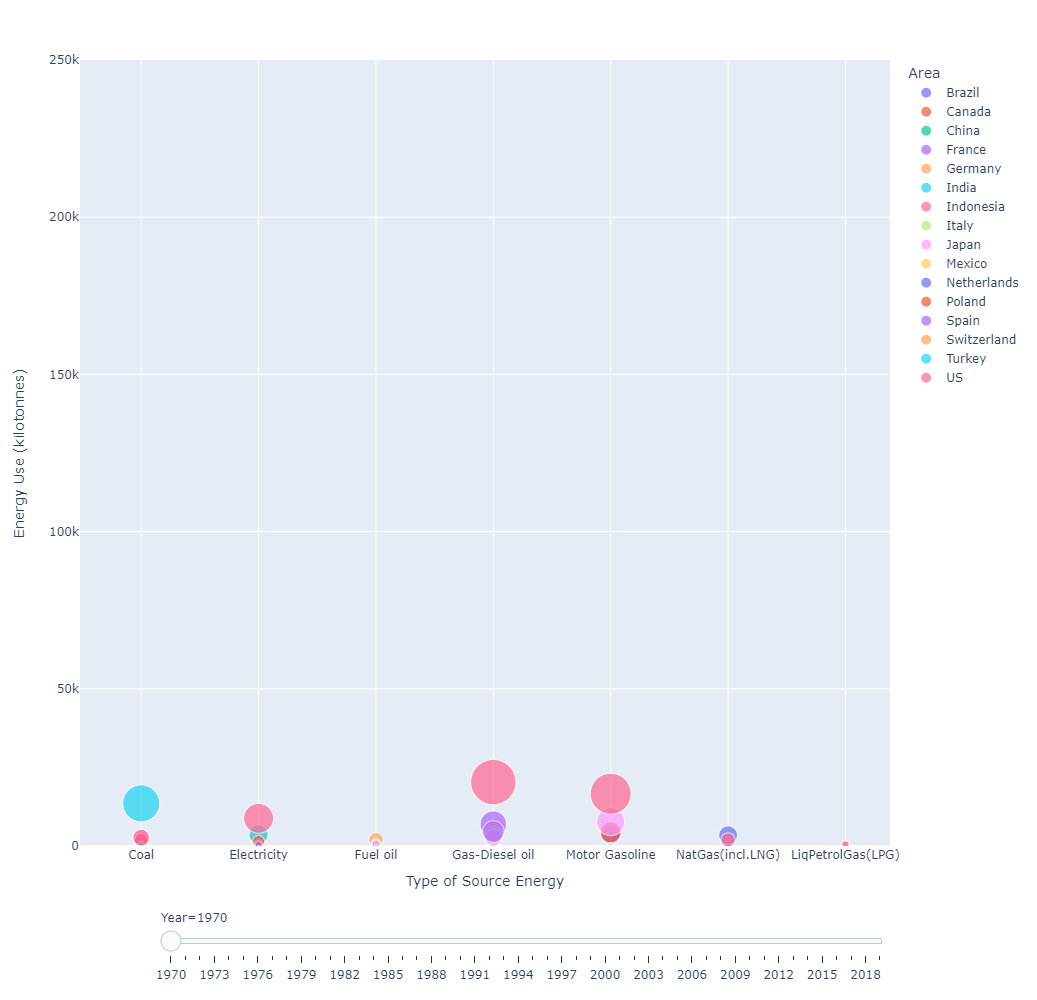

In [11]:
fig = px.scatter(energy_use, x="Item", y="Value", animation_frame="Year", animation_group="Value", size="Value",
                 color="Area", hover_name=("Element"),width=1500, height=1000,size_max=100,range_y=[0,250000],
                 labels=dict(Item="Type of Source Energy", Value="Energy Use (kilotonnes)",uniformtext_minsize=30))

fig["layout"].pop("updatemenus") # optional, drop animation buttons

fig.show()

In [12]:
energy_use_2 = pd.read_csv("FAOSTAT_data_3-20-2022_energy_use.csv")

keep_countries_2 = ["China","India","United States of America"]

# Show data from keep countries
energy_use_2 = energy_use_2[(energy_use_2["Area"].isin(keep_countries_2)) &
                        (energy_use_2["Element"] == "Emissions (CO2)") &
                        (energy_use_2["Item"] == "Electricity")].reset_index(drop=True)

# Group by Area, Item, Element and Year
energy_use_2 = energy_use_2.groupby(["Area","Item","Element","Year",])["Value"].mean().reset_index()

# Rename Items
energy_use_2["Item"] = energy_use_2["Item"].replace(to_replace=["Natural gas (including LNG)","Liquefied petroleum gas (LPG)",
                                                                "Fuel oil used in fisheries","Gas-diesel oils used in fisheries"],
                                                    value=["NatGas(incl.LNG)","LiqPetrolGas(LPG)","FuelOilFish.","GasDieselOilFish.",])

energy_use_2.head()

Area         Item          Element  Year   Value
0  China  Electricity  Emissions (CO2)  1970  0.7580
1  China  Electricity  Emissions (CO2)  1971  0.8280
2  China  Electricity  Emissions (CO2)  1972  0.8280
3  China  Electricity  Emissions (CO2)  1973  0.9283
4  China  Electricity  Emissions (CO2)  1974  0.9304

Text(0.5, 1.0, 'CO2 Emissions as result of Electricity Consumption between 1970-2019 for China, India and USA')

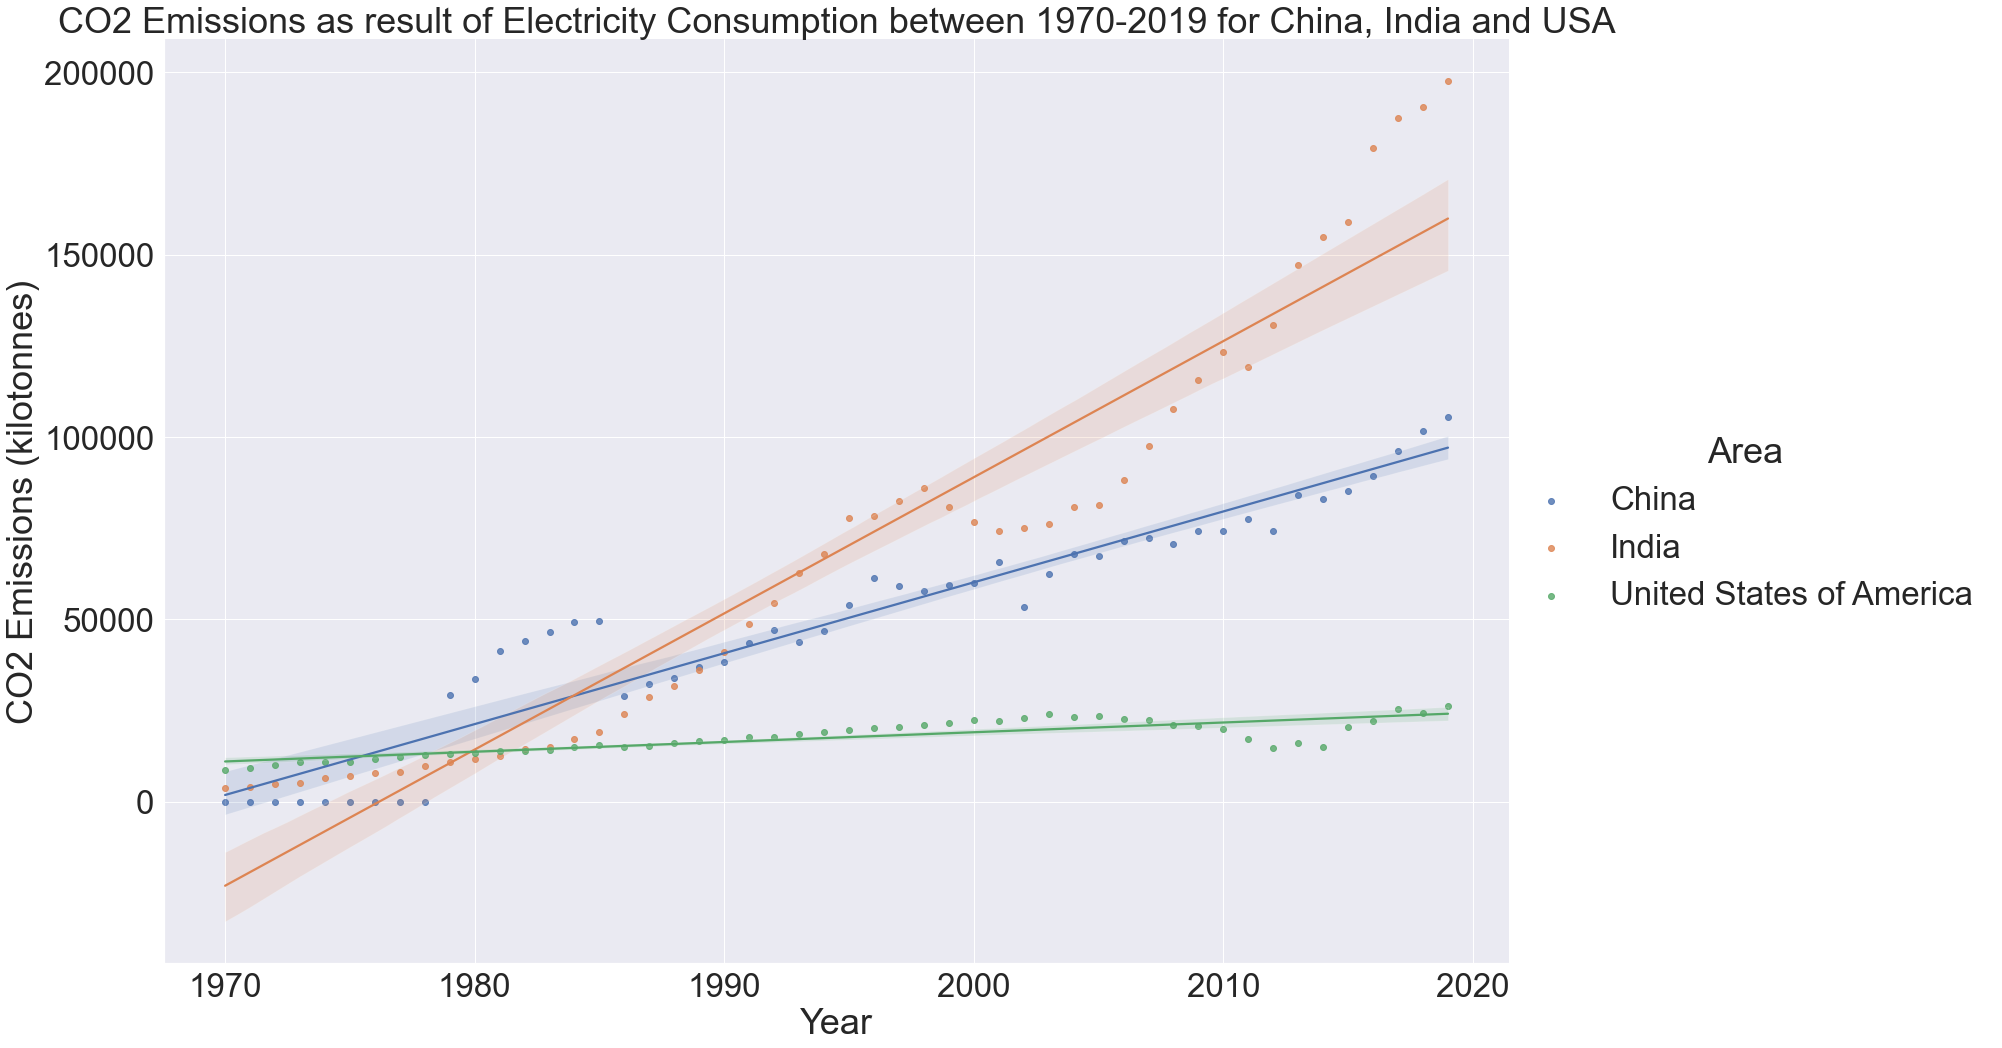

In [13]:
#Plot China and India Energy Use
sns.set(font_scale=3)
lmplot = sns.lmplot(data=energy_use_2, x="Year", y="Value",hue="Area",height=15, aspect=1.5)
lmplot.set(xlabel="Year", ylabel = "CO2 Emissions (kilotonnes)")

plt.title('CO2 Emissions as result of Electricity Consumption between 1970-2019 for China, India and USA')

In [14]:
energy_use_3 = pd.read_csv("FAOSTAT_data_3-20-2022_energy_use.csv")

keep_countries_3 = ["China","India","United States of America"]

# Show data from keep countries
energy_use_3 = energy_use_3[(energy_use_3["Area"].isin(keep_countries_3))].reset_index(drop=True)

# Group by Area, Item and Year
energy_use_3 = energy_use_3.groupby(["Area","Item"])["Value"].mean().reset_index()

# Rename Items
energy_use_3["Item"] = energy_use_3["Item"].replace(to_replace=["Natural gas (including LNG)","Liquefied petroleum gas (LPG)",
                                                                "Fuel oil used in fisheries","Gas-diesel oils used in fisheries"],
                                                    value=["NatGas(incl.LNG)","LiqPetrolGas(LPG)","FuelOilFish.","GasDieselOilFish.",])
energy_use_3.head()

Area            Item         Value
0  China            Coal  11520.994817
1  China     Electricity  17561.149965
2  China        Fuel oil     17.059166
3  China    FuelOilFish.    135.873670
4  China  Gas-Diesel oil  11798.861482

In [15]:
# Calculate Total of Value
totals = energy_use_3.groupby("Area")["Value"].sum().reset_index()
energy_use_3 = pd.merge(energy_use_3,totals, on="Area")

energy_use_3.head()

Area            Item       Value_x       Value_y
0  China            Coal  11520.994817  43410.422215
1  China     Electricity  17561.149965  43410.422215
2  China        Fuel oil     17.059166  43410.422215
3  China    FuelOilFish.    135.873670  43410.422215
4  China  Gas-Diesel oil  11798.861482  43410.422215

In [16]:
# Calculate percentage
energy_use_3["Percentage"] =energy_use_3["Value_x"] /energy_use_3["Value_y"]
energy_use_3["Percentage"] = energy_use_3["Percentage"].apply(lambda x: round(x*100, 2))

energy_use_3.head()

Area            Item       Value_x       Value_y  Percentage
0  China            Coal  11520.994817  43410.422215       26.54
1  China     Electricity  17561.149965  43410.422215       40.45
2  China        Fuel oil     17.059166  43410.422215        0.04
3  China    FuelOilFish.    135.873670  43410.422215        0.31
4  China  Gas-Diesel oil  11798.861482  43410.422215       27.18

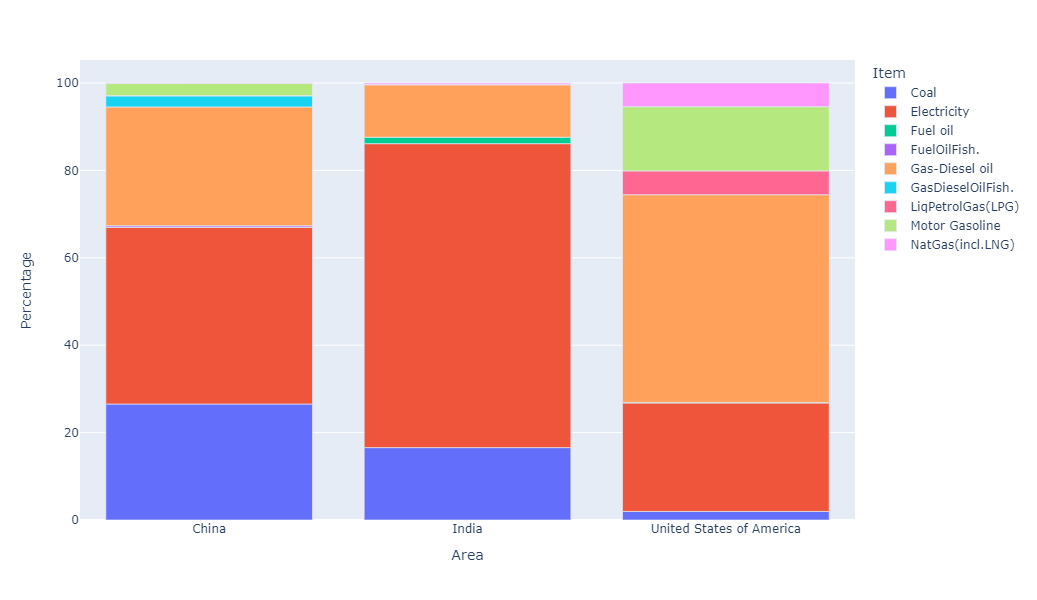

In [17]:
fig = px.bar(energy_use_3, x='Area', y='Percentage',color='Item',width=1500, height=600)
fig.show()

Temperature change

In [18]:
#load csv
temp = pd.read_csv("temperature_change_data_11-29-2021.csv")


In [19]:
# load first 5 lines from the table

In [20]:
temp.head()

Domain Code              Domain Area Code (ISO3)         Area  Element Code  \
0          ET  Temperature change              AFG  Afghanistan          7271   
1          ET  Temperature change              AFG  Afghanistan          7271   
2          ET  Temperature change              AFG  Afghanistan          7271   
3          ET  Temperature change              AFG  Afghanistan          7271   
4          ET  Temperature change              AFG  Afghanistan          7271   

              Element  Months Code       Months  Year Code  Year Unit  Value  \
0  Temperature change         7016  Dec–Jan–Feb       1961  1961   °C -0.751   
1  Temperature change         7016  Dec–Jan–Feb       1962  1962   °C  0.985   
2  Temperature change         7016  Dec–Jan–Feb       1963  1963   °C  1.931   
3  Temperature change         7016  Dec–Jan–Feb       1964  1964   °C -2.056   
4  Temperature change         7016  Dec–Jan–Feb       1965  1965   °C -0.669   

  Flag Flag Description  
0   Fc  Calculated data  
1   Fc  Calculated data  
2   Fc  Calculated data  
3   Fc  Calculated data  
4   Fc  Calculated data

In [21]:
# basic statistical details

In [22]:
temp.describe()

Element Code   Months Code     Year Code          Year         Value
count       67625.0  67625.000000  67625.000000  67625.000000  65331.000000
mean         7271.0   7018.000000   1991.306248   1991.306248      0.491524
std             0.0      1.414224     17.333343     17.333343      0.820116
min          7271.0   7016.000000   1961.000000   1961.000000     -5.979000
25%          7271.0   7017.000000   1976.000000   1976.000000     -0.011000
50%          7271.0   7018.000000   1992.000000   1992.000000      0.410000
75%          7271.0   7019.000000   2006.000000   2006.000000      0.932000
max          7271.0   7020.000000   2020.000000   2020.000000      8.206000

In [23]:
#countries to keep based on maximum Energy Use

In [24]:
areas_to_keep = ["China","India","United States of America"]

In [25]:
#filter the data

In [26]:
evolution_temp = temp[(temp["Flag Description"] != "Data Not Available") &
                (temp["Months"] == "Meteorological year") & 
                (temp["Area"].isin(areas_to_keep))].reset_index(drop=True)

In [27]:
# group by area and year

In [28]:
evolution_temp  = evolution_temp.groupby(["Area", "Year"])["Value"].mean().reset_index()
evolution_temp.head()

Area  Year  Value
0  China  1961  0.266
1  China  1962 -0.134
2  China  1963  0.292
3  China  1964 -0.020
4  China  1965  0.081

Text(0, 0.5, 'Temperature Change (degrees Celsius)')

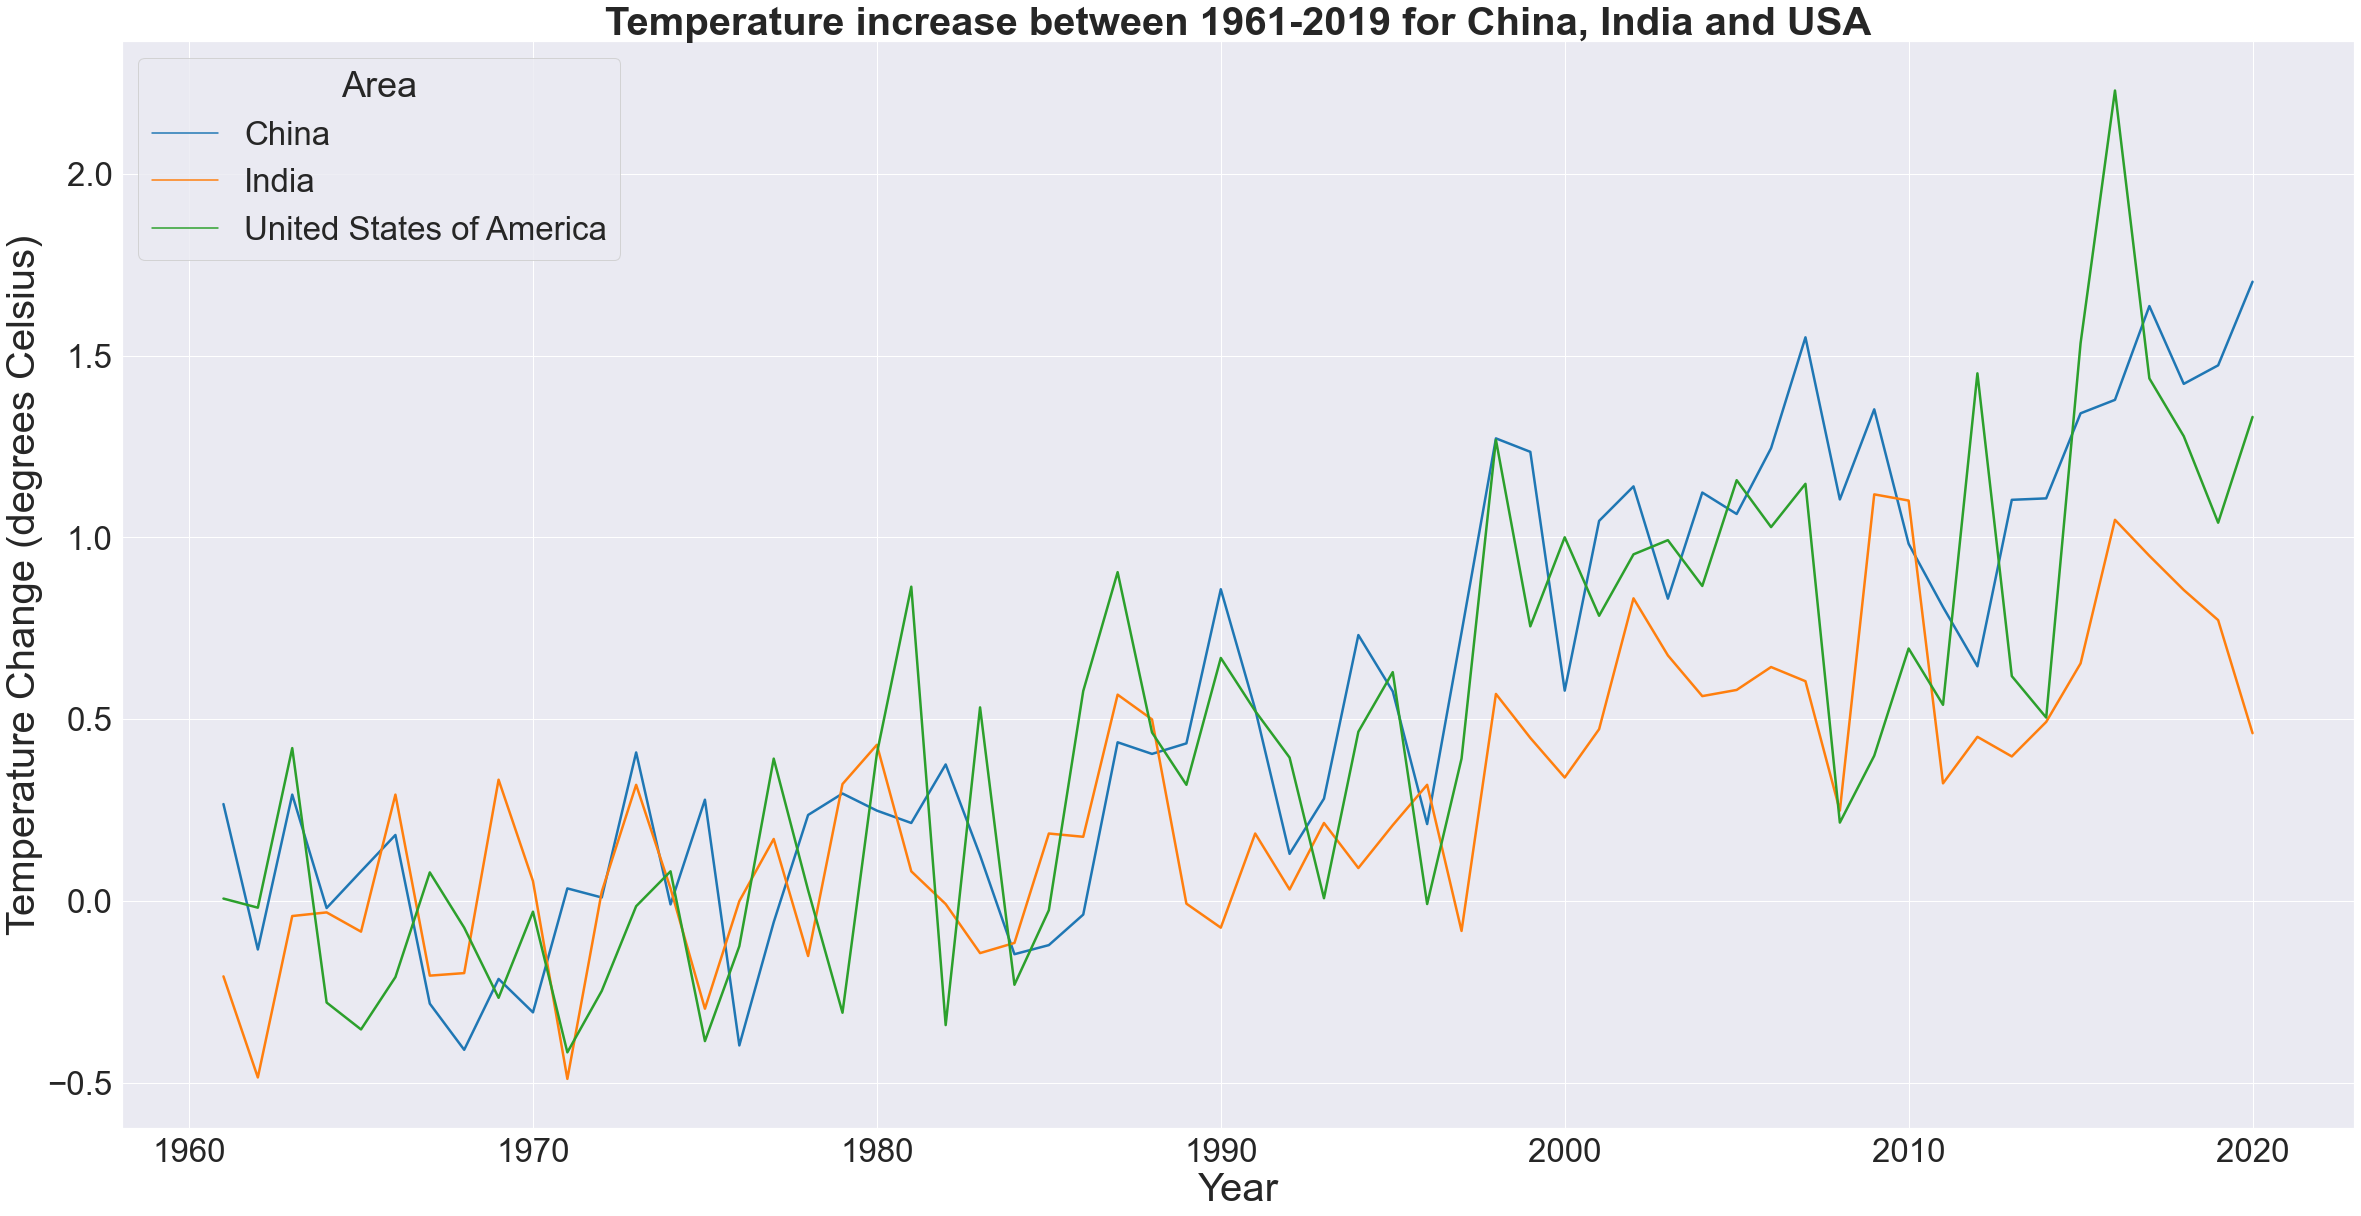

In [29]:
#Plot China and India Temperature Increase
sns.set(font_scale=3, rc={"figure.figsize":(40, 20)})
sns.lineplot(data=evolution_temp, x= "Year", y = "Value", hue ="Area", palette="tab10", linewidth=2.5)

plt.title('Temperature increase between 1961-2019 for China, India and USA', fontsize=40, weight="bold")

# Format axis labels
plt.xlabel("Year", fontsize=40)
plt.ylabel("Temperature Change (degrees Celsius)", fontsize=40)

In [30]:
# Find maximum temperature

In [31]:
# group by maximum

In [32]:
evolution_max = temp[(temp["Flag Description"] != "Data Not Available") &
                (temp["Months"] == "Meteorological year") & 
                (temp["Value"] >= 3.5)].reset_index(drop=True)

evolution_max = evolution_max.groupby(["Area", "Year"])["Value"].mean().reset_index()

evolution_max.head()

Area  Year  Value
0                         Belarus  2020  3.518
1                         Estonia  2020  3.596
2                          Latvia  2020  3.513
3              Russian Federation  2020  3.699
4  Svalbard and Jan Mayen Islands  2006  3.885

Text(0, 0.5, 'Temperature Change (degrees Celsius)')

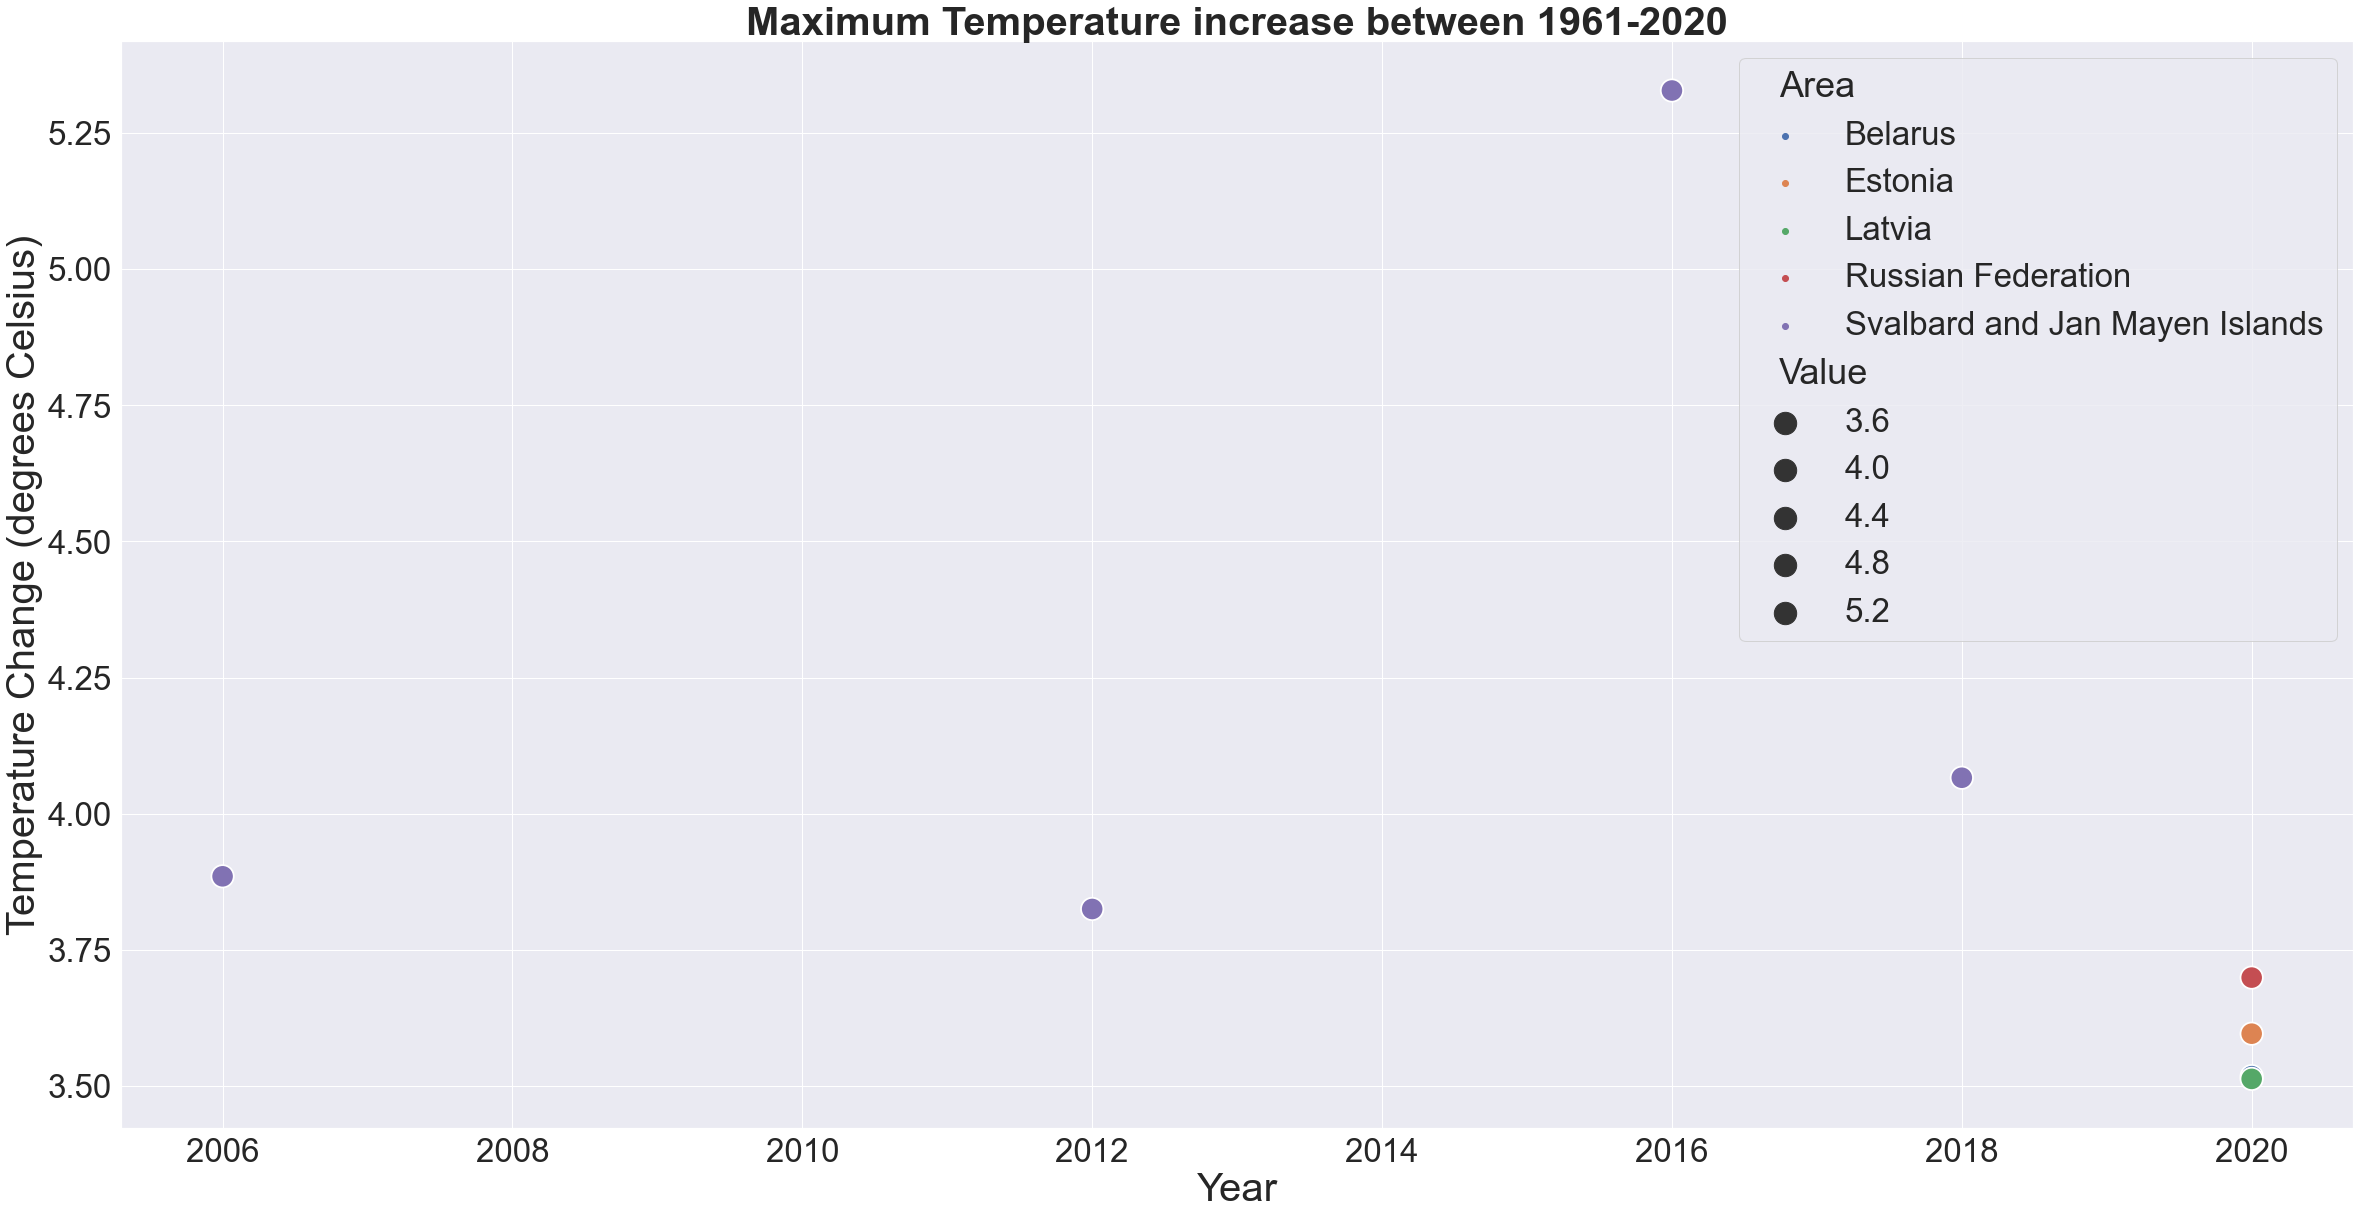

In [33]:
# Plot the maximum
sns.set(font_scale=3, rc={"figure.figsize":(40, 20)})
sns.scatterplot(data=evolution_max, x= "Year", y = "Value", hue ="Area", size='Value', sizes=(500, 500))


plt.title('Maximum Temperature increase between 1961-2020', fontsize=40, weight="bold")

# Format axis labels
plt.xlabel("Year", fontsize=40)
plt.ylabel("Temperature Change (degrees Celsius)", fontsize=40)

In [34]:
# Find minumum temperature

evolution_min = temp[(temp["Flag Description"] != "Data Not Available") &
                (temp["Months"] == "Meteorological year") & 
                (temp["Value"] < -2)].reset_index(drop=True)

evolution_min = evolution_min.groupby(["Area", "Year"])["Value"].mean().reset_index()
evolution_min.head()

Area  Year  Value
0                       Greenland  1983 -2.076
1  Svalbard and Jan Mayen Islands  1963 -2.245
2  Svalbard and Jan Mayen Islands  1966 -2.357
3  Svalbard and Jan Mayen Islands  1968 -3.251
4  Svalbard and Jan Mayen Islands  1988 -2.107

Text(0, 0.5, 'Temperature Change (degrees Celsius)')

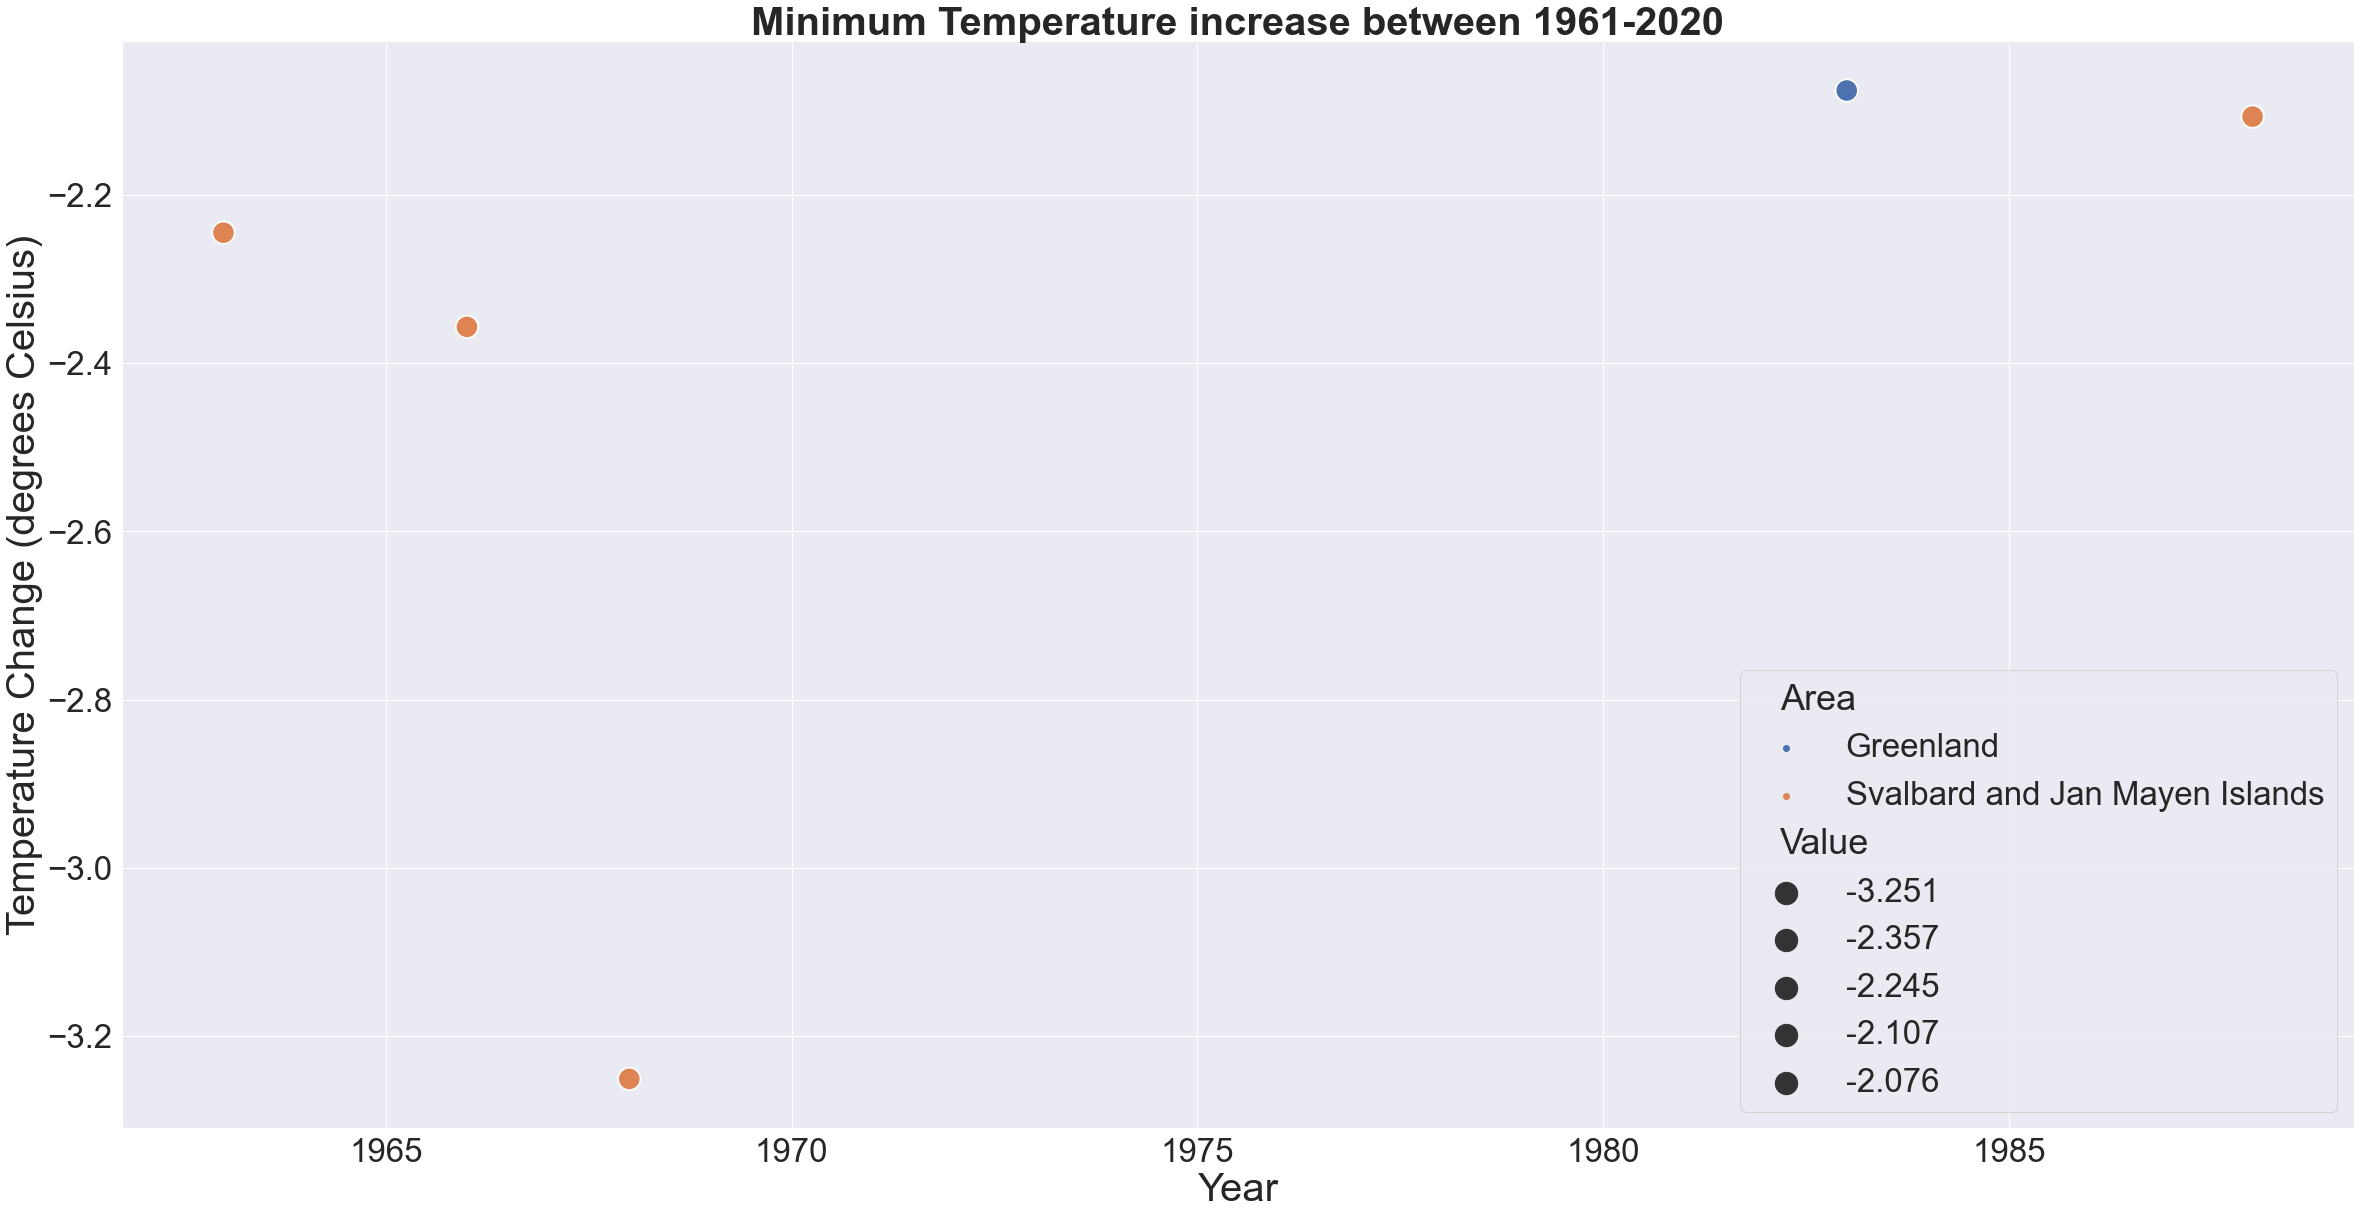

In [35]:
# Plot the minimum
sns.set(font_scale=3, rc={"figure.figsize":(40, 20)})
sns.scatterplot(data=evolution_min, x= "Year", y = "Value", hue ="Area", size='Value', sizes=(500, 500))


plt.title('Minimum Temperature increase between 1961-2020', fontsize=40, weight="bold")

# Format axis labels
plt.xlabel("Year", fontsize=40)
plt.ylabel("Temperature Change (degrees Celsius)", fontsize=40)

In [36]:
# Analize Svalbard and Jan Mayen Islands

areas_to_keep2 = ["Svalbard and Jan Mayen Islands"]

In [37]:
evolution_temp_2 = temp[(temp["Flag Description"] != "Data Not Available") &
                (temp["Months"] == "Meteorological year") & 
                (temp["Area"].isin(areas_to_keep2))].reset_index(drop=True)

evolution_temp_2 = evolution_temp_2.groupby(["Area", "Year"])["Value"].mean().reset_index()

evolution_temp_2.head()

Area  Year  Value
0  Svalbard and Jan Mayen Islands  1961  0.565
1  Svalbard and Jan Mayen Islands  1962 -1.364
2  Svalbard and Jan Mayen Islands  1963 -2.245
3  Svalbard and Jan Mayen Islands  1964 -0.504
4  Svalbard and Jan Mayen Islands  1965 -0.160

Text(0, 0.5, 'Temperature Change (degrees Celsius)')

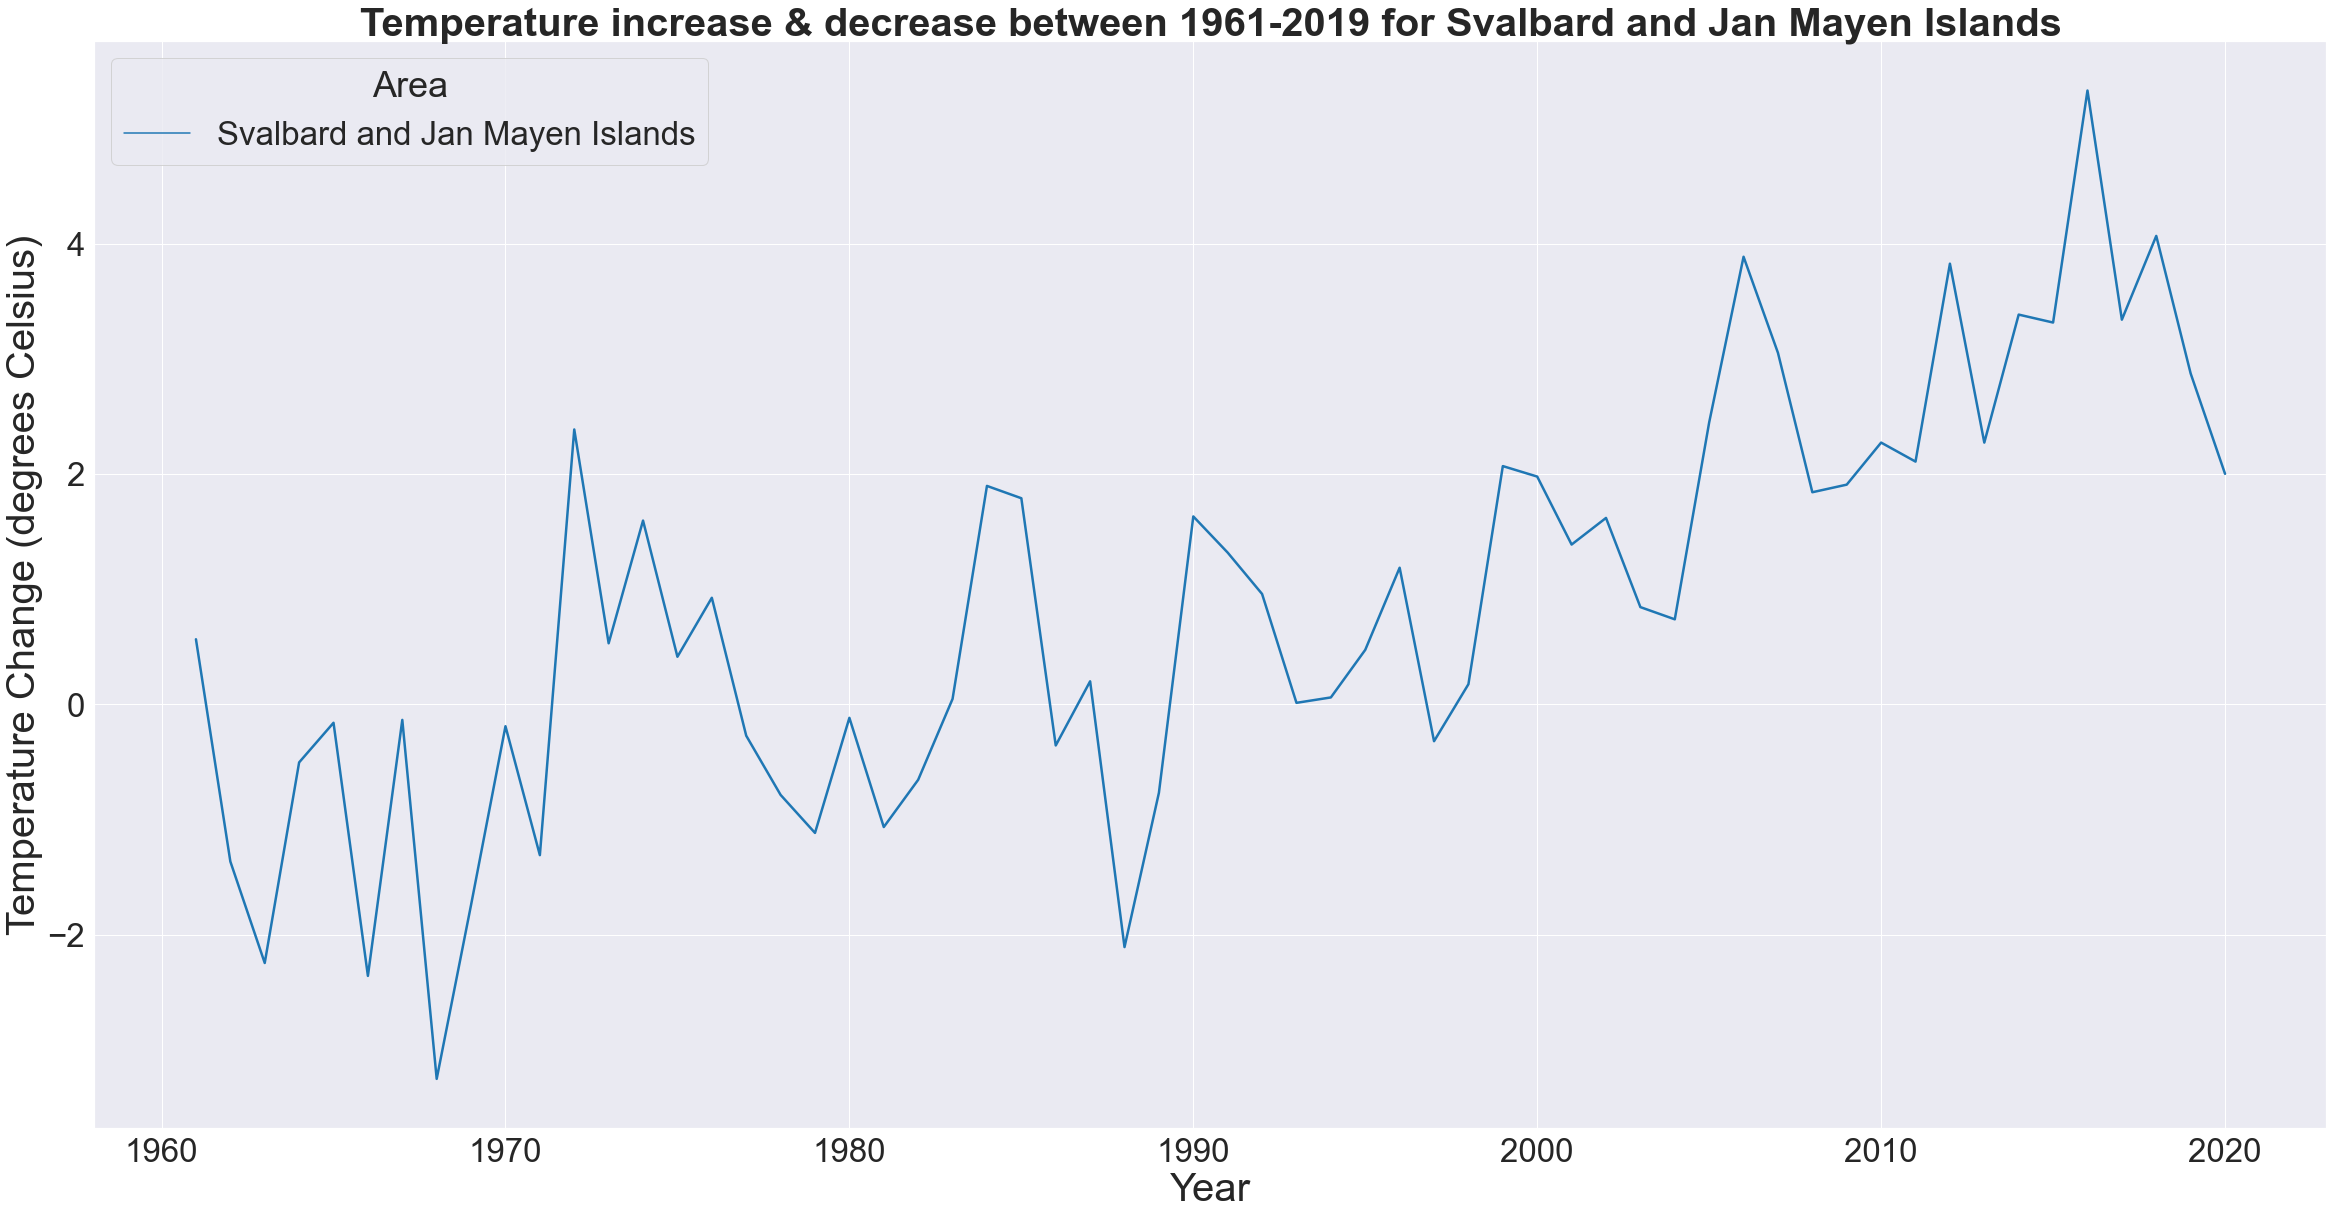

In [38]:
#Plot Svalbard and Jan Mayen Islands
sns.set(font_scale=3, rc={"figure.figsize":(40, 20)})
sns.lineplot(data=evolution_temp_2, x= "Year", y = "Value", hue ="Area", palette="tab10", linewidth=2.5)

plt.title('Temperature increase & decrease between 1961-2019 for Svalbard and Jan Mayen Islands', fontsize=40, weight="bold")

# Format axis labels
plt.xlabel("Year", fontsize=40)
plt.ylabel("Temperature Change (degrees Celsius)", fontsize=40)

Text(0, 0.5, 'Temperature Change (degrees Celsius)')

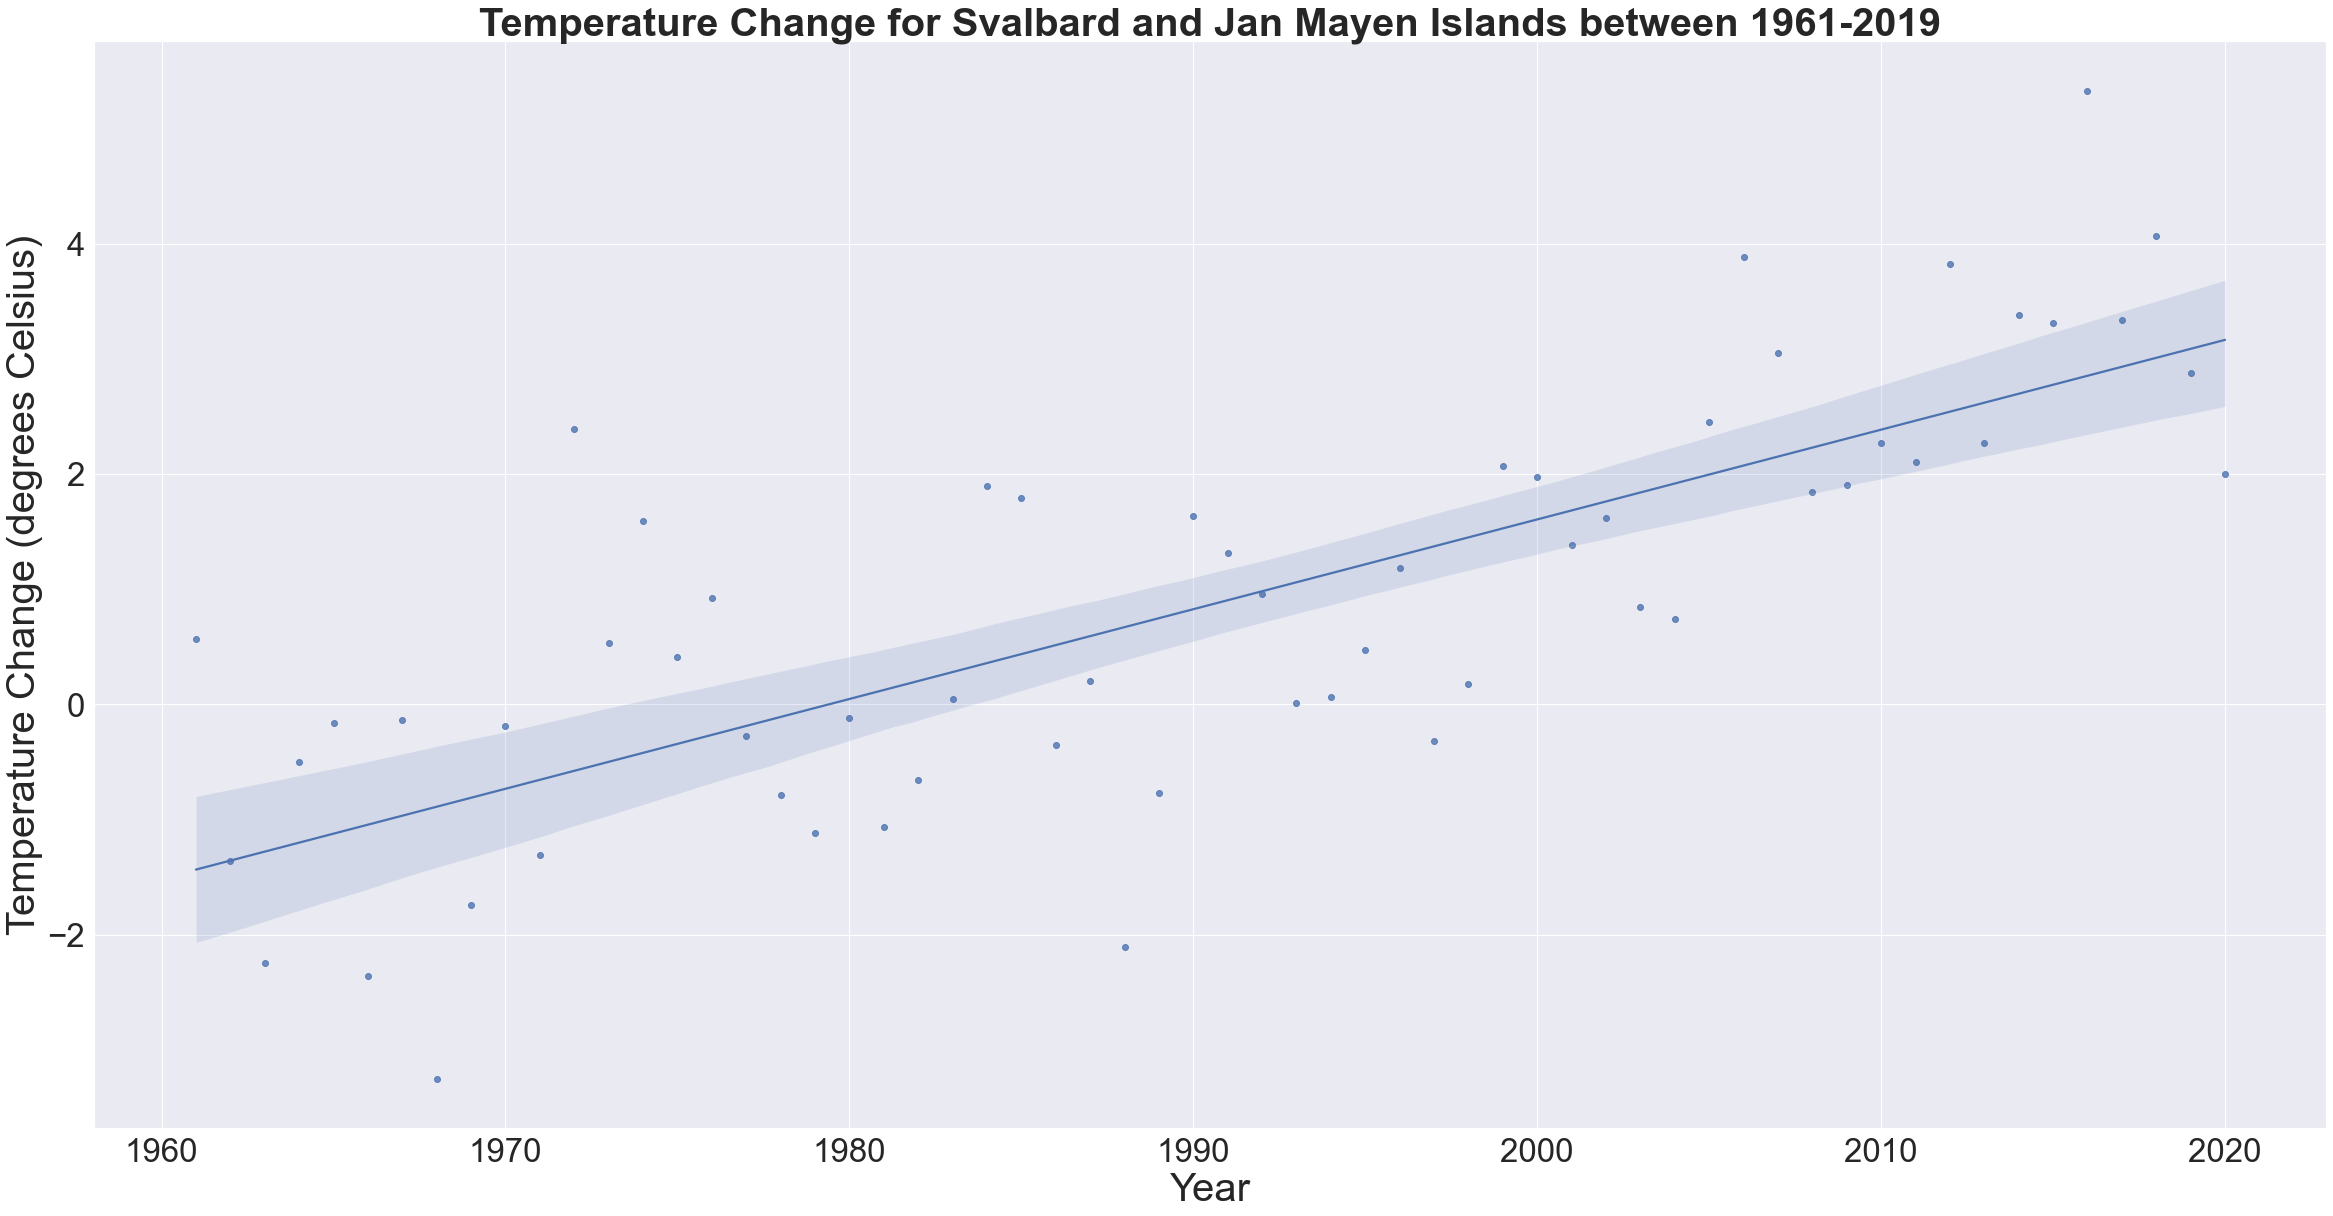

In [39]:
# Set the general figure size
sns.set(font_scale=3, rc={"figure.figsize":(40, 20)})

regplot = sns.regplot(data=evolution_temp_2, x="Year", y="Value")

# Add a general title
plt.title("Temperature Change for Svalbard and Jan Mayen Islands between 1961-2019", fontsize=40, weight="bold")

# Format axis labels
plt.xlabel("Year", fontsize=40)
plt.ylabel("Temperature Change (degrees Celsius)", fontsize=40)